## PCA dim expansion

In [1]:
import numpy as np
import math
import pickle
from numpy import linalg as LA
from numpy import cov
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# we load the hidden space extracted from network
coding_filepath = 'coding_Average_CAE_deep-256x8x8.pkl'
coding_act = np.load(coding_filepath)

In [3]:
# flatten the feature maps
coding_act_flat = coding_act.reshape(6400, -1)
coding_act_flat.shape

(6400, 16384)

In [4]:
# PCA on the feature space
num_components = 100

x = coding_act_flat

print(f'features shape before{x.shape}')

x_mean = np.mean(x, axis=0)
x_centered = x - x_mean

# Using scipy package
# percentage of variance explained: PCA(0.95)
pca = PCA(0.99)
# can also use: PCA(n_components=2)
x_trans = pca.fit_transform(x_centered)
# pca.explained_variance_ are the eigenvalues
eigenvalues = pca.explained_variance_ 
print(len(eigenvalues))
# pca.components_ are the eigenvectors
# print(pca.components_[1,:])

print(f'features shape after{x_trans.shape}')



features shape before(6400, 16384)
980
features shape after(6400, 980)


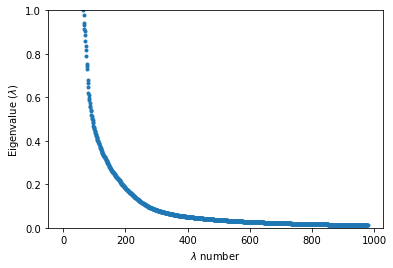

In [5]:
# Plot eigenvalues 
plt.plot(eigenvalues, '.')
plt.ylabel('Eigenvalue $(\lambda)$')
plt.xlabel('$\lambda$ number')
# plt.ylim([0,1])
plt.show()

In [6]:
# Rescale the dataset in the PC space

# sqrt of eigenvalues because Cov = X.T@X, so you need to rescale X by sqrt(eigenval)
rescale = np.diag( np.concatenate( (1./np.sqrt(eigenvalues[:300]), np.ones(680)) ) )

print(rescale[:400, :400])

x_rescale_trans = x_trans@rescale

[[0.07997368 0.         0.         ... 0.         0.         0.        ]
 [0.         0.11514249 0.         ... 0.         0.         0.        ]
 [0.         0.         0.13705863 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [7]:
# Transform back
x_rescale = x_rescale_trans@pca.components_

features shape before(6400, 16384)
763
features shape after(6400, 763)


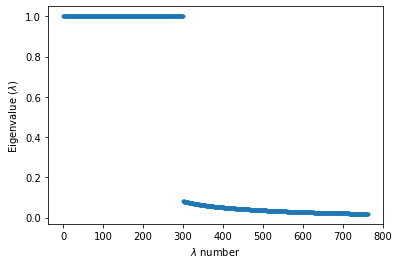

In [8]:
# Do PCA ones again on x_rescale
print(f'features shape before{x_rescale.shape}')

# print(features.shape)
# features_ts = scaler.fit_transform(features)
x_centered = x_rescale

# Using scipy package

# percentage of variance explained: PCA(0.95)
# can also use: PCA(n_components=2)
pca_return = PCA(0.99)
x_centered = pca_return.fit_transform(x_centered)
# pca_return.explained_variance_ are the eigenvalues
eigenvalues_return = pca_return.explained_variance_ 
print(len(eigenvalues_return))
# pca_return.components_ are the eigenvectors
# print(pca_return.components_[1,:])

print(f'features shape after{x_centered.shape}')

# Plot eigenvalues_return 
plt.plot(eigenvalues_return, '.')
plt.ylabel('Eigenvalue $(\lambda)$')
plt.xlabel('$\lambda$ number')
plt.show()

In [ ]:
# add rescaled mean to x_rescale (?)